# Hypothesis Testing with Insurance Data

## Requirements

Work with the US Health Insurance Dataset from Kaggle.

Answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:
- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis
- Show a supporting visualization that helps display the result

In [9]:
## Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

plt.style.use(['dark_background', 'seaborn-v0_8-pastel'])

In [2]:
## Load data
df = pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q1. Do smokers have higher insurance charges than non-smokers?

State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis (H$_0$): There is no difference in insurance charges for smokers vs. non-smokers
- Alternate Hypothesis (H$_A$): There is a difference in insurance charges for smokers vs. non-smokers
- Alpha: 0.05

Select the correct test according to the data type and number of samples

- What type of data do we have? Numeric
- How many groups am I comparing? Two

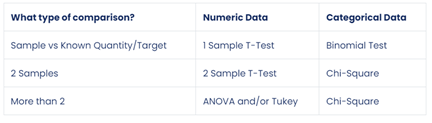

- Thus, 2 Sample T-Test

_Preparation and visualization_

In [6]:
## View the groups field
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
## Create groups
smokers = df.loc[df['smoker'] == 'yes'].copy()
non_smokers = df.loc[df['smoker'] == 'no'].copy()

In [8]:
## View the measurements field
smokers_charges = smokers['charges']
non_smokers_charges = non_smokers['charges']

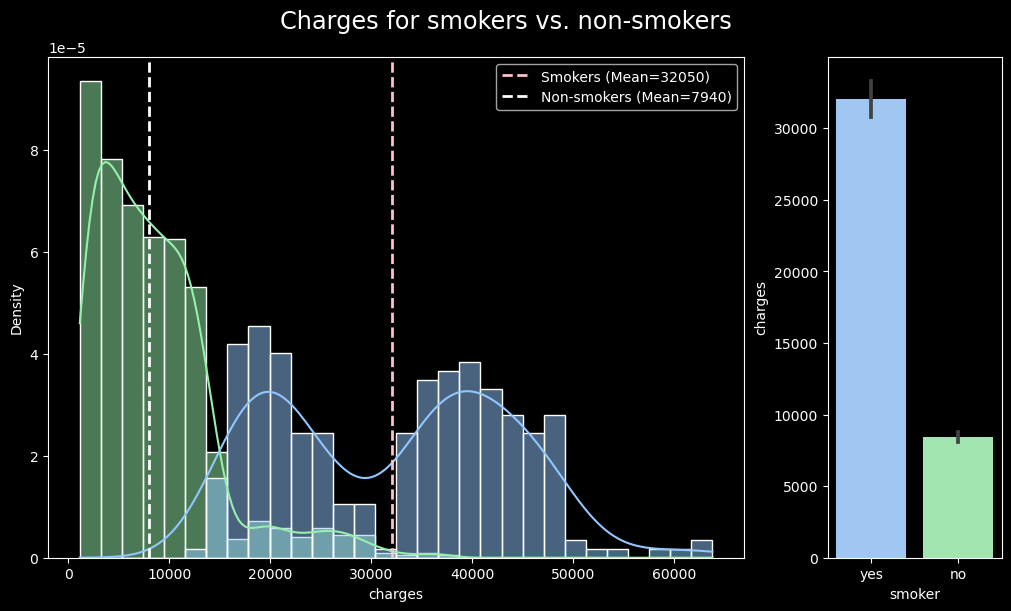

In [34]:
## Visualize the means per group
fig, (ax, ax_bar) = plt.subplots(figsize= (10,6), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})

## Histogram
ax = sns.histplot(data=df, x='charges', fill=True, hue='smoker', kde=True,
                  stat='density', common_norm=False, ax=ax)

ax.axvline(np.mean(smokers_charges), ls='--',lw=2,
           label=f"Smokers (Mean={np.mean(smokers_charges):.0f})", color='pink')

ax.axvline(np.mean(non_smokers_charges), ls='--', lw=2,
           label=f"Non-smokers (Mean={np.mean(non_smokers_charges):.0f})", color='white')

ax.legend(prop={"size":10}, loc='upper right')#bbox_to_anchor=[1,1])

## Barplot
sns.barplot(data=df, x='smoker', y='charges', ax = ax_bar)

fig.suptitle('Charges for smokers vs. non-smokers', fontsize='xx-large');

Test the assumptions of your selected test

Assumptions:
- No significant outliers
- Normality
- Equal Variance

In [18]:
## Check for outliers

## Find outliers for smokers
zscores = stats.zscore(smokers_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [20]:
## Find outliers for non-smokers
zscores = stats.zscore(non_smokers_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [21]:
## Remove outliers from non-smokers
non_smokers_charges = non_smokers_charges[~outliers]
non_smokers_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [ ]:
## Test for normality

# Both groups are n > 15 so we can skip this step

In [23]:
## Test for equal variance

levene = stats.levene(smokers_charges, non_smokers_charges)
levene

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [24]:
levene.pvalue<.05

True

- Null Hypothesis (H$_0$) of Levene's test is that the two groups have equal variance.

- Based on the above we reject our H$_0$.
- i.e. the our two groups do not have equal varaince.

- Thus, we do not meet all the assumptions of the 2 Sample T-Test and we will run the Welch's T-Test.

Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [25]:
result = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [26]:
result.pvalue<.05

True

Interpret your p-value and reject or fail to reject your null hypothesis

- Based on the above we reject our H$_0$.
- i.e. There is a difference in insurance charges for smokers vs. non-smokers.

Show a supporting visualization that helps display the result

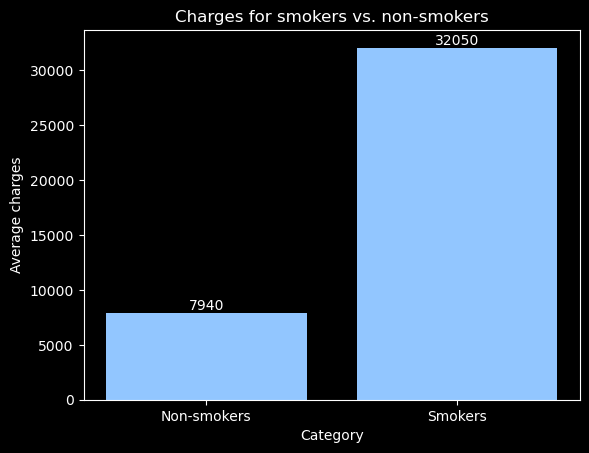

In [32]:
## Barplot
plt.bar(['Non-smokers', 'Smokers'], [non_smokers_charges.mean(), smokers_charges.mean()])

for i, v in enumerate([non_smokers_charges.mean(), smokers_charges.mean()]):
    plt.text(i, v + 0.05, "{:.0f}".format(v), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Average charges')
plt.title('Charges for smokers vs. non-smokers')

plt.show();

- The average charges for smokers is higher than the average charges for non-smokers.

### Q2. Are men more likely to smoke than women?

State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis (H$_0$): Men and women are equal likely to be smokers
- Alternate Hypothesis (H$_A$): Men are more likely to smoke than women
- Alpha: 0.05

Select the correct test according to the data type and number of samples

- What type of data do we have? Categorical
- How many groups am I comparing? Two

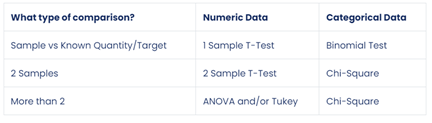

- Thus, Chi-Square Contingency Test

_Preparation and visualization_

In [33]:
## Calculate the contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


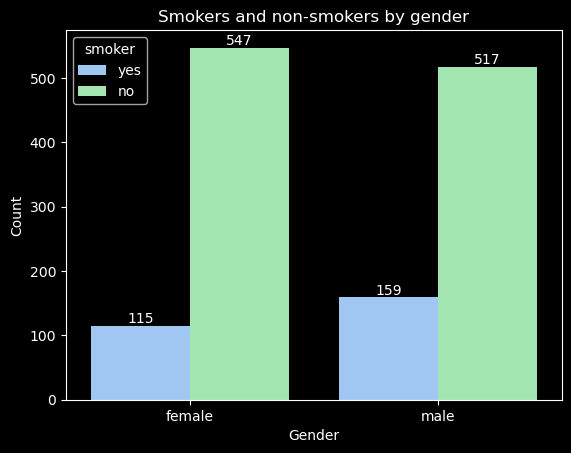

In [37]:
## Visualize the count per group

ax = sns.countplot(data=df, x='sex', hue='smoker')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Smokers and non-smokers by gender')

# Adding data labels
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='white', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show();

Test the assumptions of your selected test

Assumptions:
- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

- We meet these assumptions and will run the Chi-Square Contingency Test.

Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [42]:
result = stats.chi2_contingency(table)
result

Chi2ContingencyResult(statistic=7.39291081459996, pvalue=0.006548143503580696, dof=1, expected_freq=array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))

In [43]:
result.pvalue<.05

True

Interpret your p-value and reject or fail to reject your null hypothesis

- Based on the above we reject our H$_0$.
- i.e. Men may be more likely to smoke than women.

Show a supporting visualization that helps display the result

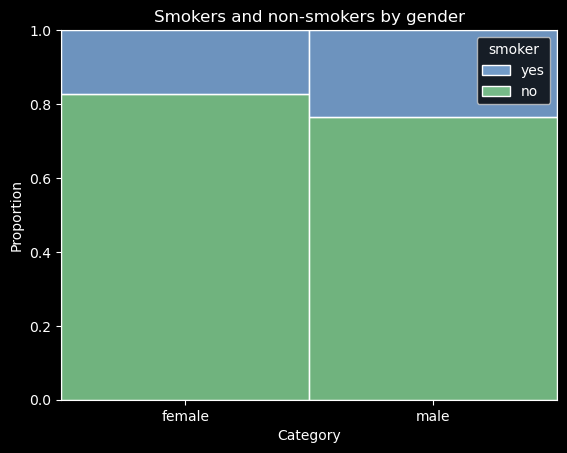

In [51]:
## Filled histogram
sns.histplot(data=df, x='sex', hue='smoker', stat='probability', multiple='fill')

plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Smokers and non-smokers by gender')
        
plt.show();

- Men seem to be more likely to smoke than women.

### Q3. Do different regions have different charges, on average?

State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis (H$_0$): There is no difference in insurance charges by region
- Alternate Hypothesis (H$_A$): There is a difference in insurance charges by region
- Alpha: 0.05

Select the correct test according to the data type and number of samples

- What type of data do we have? Numeric
- How many groups am I comparing? More than two

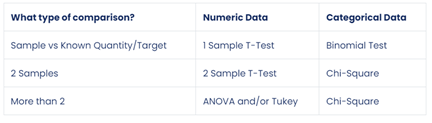

- Thus, ANOVA and/or Tukey

_Preparation and visualization_

In [52]:
## View the groups field
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [56]:
## Create groups dictionary
groups = {}

for region in df['region'].unique():
    data = df.loc[df['region']==region,'charges'].copy()

    groups[region] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

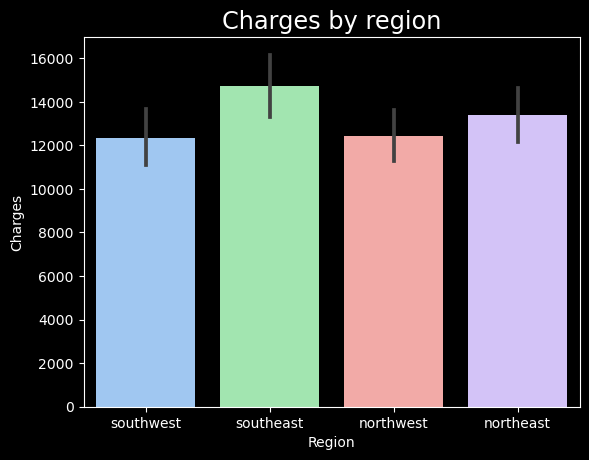

In [55]:
## Visualize the means per group

## Barplot
sns.barplot(data=df, x='region',y='charges')


plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges by region',fontsize='xx-large')
        
plt.show();

Test the assumptions of your selected test

Assumptions:
- No significant outliers
- Normality
- Equal Variance

In [58]:
## Check for outliers

## Find and remove outliers for smokers

groups_excl_outliers = {}

for grp, info in groups.items():

    zscores = stats.zscore(info)
    outliers = abs(zscores)>3
    excl_outliers = np.sum(outliers)
    
    print(f"{grp}: {excl_outliers} outliers removed.")
    info_excl_outliers = info[~outliers]
    groups_excl_outliers[grp] = info_excl_outliers
    
groups_excl_outliers.keys()

- For southwest, there were 8 outliers removed.
- For southeast, there were 2 outliers removed.
- For northwest, there were 7 outliers removed.
- For northeast, there were 4 outliers removed.


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [ ]:
## Test for normality

# All groups are n > 15 so we can skip this step

In [61]:
## Test for normality

#norm_results = []

#for grp, info in groups_excl_outliers.items():
    
#    stat, p = stats.normaltest(info)
#    norm_results.append({'group' : grp, 'n': len(data),
#                         'p' : p, 'sigma' : p<.05})

#norm_results_df = pd.DataFrame(norm_results)
#norm_results_df

In [64]:
## Test for equal variance

levene = stats.levene(*groups_excl_outliers.values())
levene

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [65]:
levene.pvalue<.05

True

- Null Hypothesis (H$_0$) of Levene's test is that the groups have equal variance.
- Based on the above we reject our H$_0$.
- i.e. our groups do not have equal varaince


- Thus, we do not meet all the assumptions of the ANOVA Test and we will run the Kruskal-Wallis Test.

Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [66]:
result =  stats.kruskal(*groups_excl_outliers.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

In [67]:
result.pvalue<.05

False

Interpret your p-value and reject or fail to reject your null hypothesis

- Based on the above we fail to reject our H$_0$.
- i.e. There is no difference in insurance charges by region.

Show a supporting visualization that helps display the result

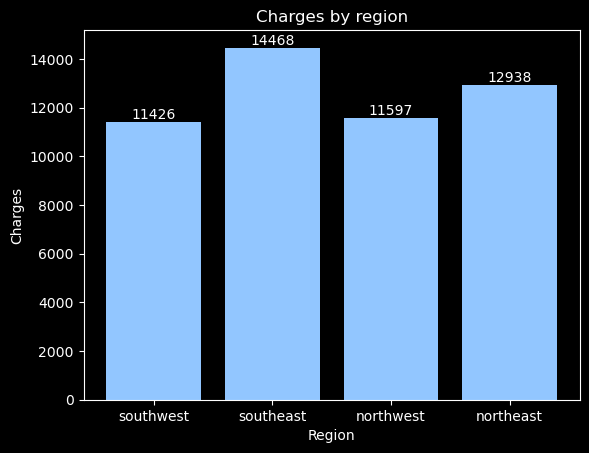

In [78]:
average_charges_by_region = {region: data.mean() for region, data in groups_excl_outliers.items()}

## Barplot
plt.bar(average_charges_by_region.keys(), average_charges_by_region.values())

for i, v in enumerate(average_charges_by_region.values()):
    plt.text(i, v + 0.05, "{:.0f}".format(v), ha='center', va='bottom')

plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges by region')

plt.show();

- There is no significant difference in insurance charges by region.